### Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 구글 드라이브 마운트


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Working Directory 설정
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/딥러닝/data')

파일은 auto-mpg.csv 입니다.

In [5]:
df = pd.read_csv('auto-mpg.csv')

In [6]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.isna().sum()

,0
mpg,0
cyl,0
displ,0
hp,0
weight,0
accel,0
yr,0
origin,0
name,0


In [8]:
df.head(2)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [9]:
y = df['mpg']

In [10]:
X = df.loc[ : , 'cyl' : 'origin'  ]

In [11]:
X.head()

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [13]:
sorted( X['cyl'].unique() )

[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]

In [14]:
X['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [15]:
X.shape

(392, 7)

In [16]:
X['yr'].value_counts()

,count
yr,
73,40
78,36
76,34
82,30
75,30
79,29
70,29
72,28
77,28


In [18]:
df.corr(numeric_only= True)

,mpg,cyl,displ,hp,weight,accel,yr,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displ,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
accel,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [20]:
sorted( X['origin'].unique() )

[np.int64(1), np.int64(2), np.int64(3)]

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [24]:
ct = ColumnTransformer( [ ('onehot', OneHotEncoder(), [0, 5, 6] ) ,
                          ( 'scaler' , StandardScaler(), [1,2,3,4] ) ] )

In [26]:
X_scaled = ct.fit_transform(X)

In [28]:
# 눈으로 확인
X_scaled.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.66413273,
         0.62054034, -1.285258  ],
       [ 0.        ,  0.        ,  0.        , ...,  1.57459447,
         0.84333403, -1.46672362],
       [ 0.        ,  0.        ,  0.        , ...,  1.18439658,
         0.54038176, -1.64818924],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.53247413,
        -0.80463202, -1.4304305 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.66254009,
        -0.41562716,  1.11008813],
       [ 0.        ,  1.        ,  0.        , ..., -0.58450051,
        -0.30364091,  1.40043312]])

In [30]:
scaler_y = StandardScaler()

In [33]:
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=50)

In [ ]:
# 딥러닝 모델링

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
X_train.toarray().shape

(313, 25)

In [42]:
y_train

array([[ 0.07108125],
       [-0.74995305],
       [-1.21178485],
       [-1.34007146],
       [ 0.71251431],
       [-1.34007146],
       [-1.21178485],
       [ 0.19936787],
       [ 1.28980405],
       [-1.46835807],
       [ 0.84080092],
       [-0.31377858],
       [ 0.96908753],
       [-0.44206519],
       [ 0.32765448],
       [-0.95521163],
       [-0.36509322],
       [-0.3394359 ],
       [ 1.62334924],
       [-0.69863841],
       [ 0.07108125],
       [ 0.8151436 ],
       [-0.82692502],
       [-1.08349824],
       [ 0.45594109],
       [-0.44206519],
       [ 0.93060155],
       [ 1.14868878],
       [ 1.61052058],
       [ 1.405262  ],
       [-0.18549197],
       [-0.95521163],
       [-1.21178485],
       [-1.72493129],
       [-0.69863841],
       [-1.34007146],
       [ 1.82860782],
       [ 0.77665761],
       [ 0.84080092],
       [ 0.59705636],
       [ 0.96908753],
       [-1.46835807],
       [-0.05720536],
       [-1.34007146],
       [ 0.25068251],
       [-1

In [44]:
def build_model( n_features ) :
  model = Sequential()
  model.add( keras.Input(shape= (n_features, ) ) )

  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=16, activation='relu'))

  model.add( Dense(units=1 , activation='linear'))
  return model

In [51]:
model = build_model( 25 )

In [52]:
# 컴파일

In [53]:
model.compile( optimizer=keras.optimizers.RMSprop() ,
               loss= keras.losses.MeanSquaredError(),
               metrics = [keras.metrics.R2Score() ])

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
epoch_history = model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7045 - r2_score: 0.3121  
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4529 - r2_score: 0.5629 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3137 - r2_score: 0.7082 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2798 - r2_score: 0.7215 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2535 - r2_score: 0.7691 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2010 - r2_score: 0.8126 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1602 - r2_score: 0.8442 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1256 - r2_score: 0.8703 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1305 - r2_score: 0.8763 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1179 - r2_score: 0.8804 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1054 - r2_score: 0.9003 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [57]:
epoch_history.history.keys()

dict_keys(['loss', 'r2_score'])

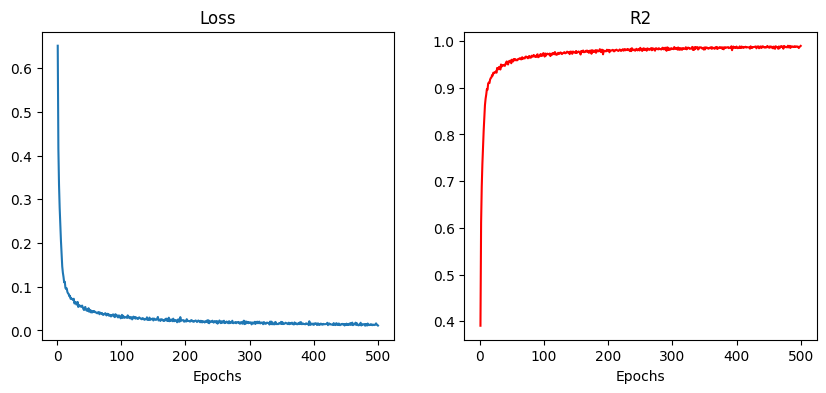

In [67]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot( range(1, 500+1)  ,  epoch_history.history['loss'] )
plt.title('Loss')
plt.xlabel('Epochs')


plt.subplot(1,2,2)
plt.plot( range(1, 500+1)  ,  epoch_history.history['r2_score'], color='red' )
plt.title('R2')
plt.xlabel('Epochs')


plt.savefig('loss.png')
plt.show()

In [68]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0724 - r2_score: 0.8914 


[0.07393281161785126, 0.8894864320755005]

In [ ]:
# 학습만 다 시키고 나서, 맨 마지막에 평가를 하면, 오버핏팅 문제가 발생하므로
# 중간고사 기말고사 쪽지시험 보듯이 중간중간 에포크 끝날때마다 시험을 본다 => validation

In [70]:
model = build_model( 25 )

In [71]:
model.compile( optimizer=keras.optimizers.RMSprop() ,
               loss= keras.losses.MeanSquaredError(),
               metrics = [keras.metrics.R2Score() ])

In [72]:
X_train.shape

(313, 25)

In [73]:
# 쪽지시험용 데이터 셋팅 validation_split => 학습데이터의 20%는 시험용으로 빼놓는다.
epoch_history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.7337 - r2_score: 0.2861 - val_loss: 0.4982 - val_r2_score: 0.5780
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4201 - r2_score: 0.5914 - val_loss: 0.3394 - val_r2_score: 0.7125
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3201 - r2_score: 0.6857 - val_loss: 0.2752 - val_r2_score: 0.7668
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2707 - r2_score: 0.7347 - val_loss: 0.2437 - val_r2_score: 0.7936
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2396 - r2_score: 0.7759 - val_loss: 0.2039 - val_r2_score: 0.8273
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2304 - r2_score: 0.7924 - val_loss: 0.1765 - val_r2_score: 0.8505
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1417 - r2_score: 0.8619 - val_loss: 0.1513 - val_r2_score: 0.8718
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1364 - r2_score: 0.8612 - val_loss: 0.1357 - val_r2_score:

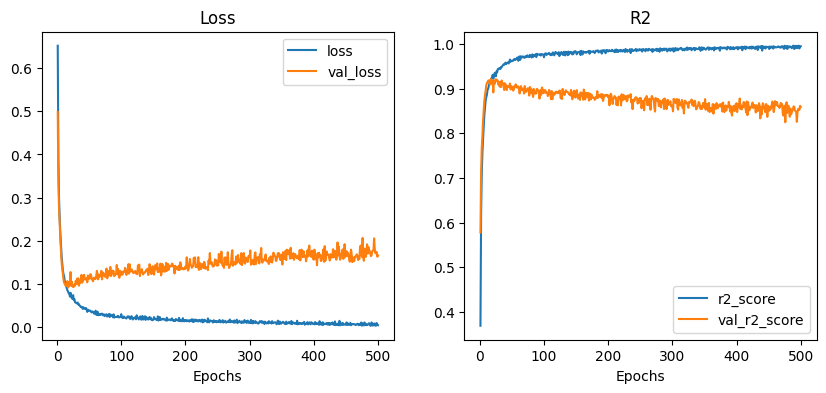

In [74]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot( range(1, 500+1)  ,  epoch_history.history['loss'] )
plt.plot( range(1, 500+1)  ,  epoch_history.history['val_loss'] )
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')


plt.subplot(1,2,2)
plt.plot( range(1, 500+1)  ,  epoch_history.history['r2_score'] )
plt.plot( range(1, 500+1)  ,  epoch_history.history['val_r2_score'] )
plt.legend(['r2_score','val_r2_score'])
plt.title('R2')
plt.xlabel('Epochs')


plt.savefig('loss.png')
plt.show()

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [76]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [77]:
model = build_model(25)

model.compile( optimizer=keras.optimizers.RMSprop() ,
               loss= keras.losses.MeanSquaredError(),
               metrics = [keras.metrics.R2Score() ])


In [78]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [79]:
checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss',
                             save_best_only=True, verbose=1)

In [80]:
epoch_history = model.fit(X_train, y_train, epochs=100000, batch_size=32, validation_split=0.2,
                          callbacks=[early_stopping, checkpoint])

Epoch 1/100000
1/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 1.5477 - r2_score: -0.3087
Epoch 1: val_loss improved from inf to 0.49613, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 1.0074 - r2_score: 0.1058 - val_loss: 0.4961 - val_r2_score: 0.5797
Epoch 2/100000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5187 - r2_score: 0.4975
Epoch 2: val_loss improved from 0.49613 to 0.37729, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4423 - r2_score: 0.5877 - val_loss: 0.3773 - val_r2_score: 0.6804
Epoch 3/100000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2071 - r2_score: 0.7680
Epoch 3: val_loss improved from 0.37729 to 0.31371, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2709 - r2_score: 0.7237 - val_loss: 0.3137 - val_r2_score: 0.7342
Epoch 4/100000
1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - loss: 0.2657 - r2_score: 0.7660
Epoch 4: val_loss improved from 0.31371 to 0.27379, saving

In [83]:
best_model = keras.models.load_model('best_model.keras')

In [84]:
best_model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1043 - r2_score: 0.8435 


[0.08699002116918564, 0.8699687123298645]